### Лабораторная работа 1. Разведочный анализ и предобработка данных

#### Задачи:
1. Скачать один из наборов данных
2. Загрузить данные в датафрейм
3. Вывести статистическую информацию о наборе данных
4. Вывести названия столбцов и строк
5. Заменить категориальные данные количественными
6. Визуализировать данные с помощью Matplotlib и Seaborn

Должно быть не менее 2х визуализаций на каждый признак. Выберите самые красивые визуализации! Должно быть не менее 3х групповых визуализаций

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#### Описание датасета:
Для анализа используется датасет "Workout & Fitness Tracker Dataset", содержащий данные из разных фитнес-приложений и устройств, чтобы прогнозировать эффективность тренировок.

- **User ID:** Уникальный идентификатор для каждого пользователя
- **Age:** Возраст пользователя (18-60 лет)
- **Gender:** Мужской, Женский, Другой
- **Height (cm):** Рост пользователя в сантиметрах
- **Weight (kg):** Вес пользователя в килограммах
- **Workout Type:** Тип тренировки (кардио, силовая, йога, HIIT, велоспорт, бег)
- **Workout Duration (mins):** Общее время, проведенное за тренировкой
- **Calories Burned:** Общее количество сожженных калорий во время тренировки
- **Heart Rate (bpm):** Средняя частота сердечных сокращений во время тренировки
- **Steps Taken:** Количество записанных шагов (для тренировок ходьба/бег)
- **Distance (km):** Пройденное расстояние в километрах
- **Workout Intensity:** Низкая, Средняя, ​​Высокая
- **Sleep Hours:** Часы сна перед тренировкой
- **Water Intake (liters):** Потребляемая вода в литрах
- **Daily Calories Intake:** Общее количество потребляемых калорий за день
- **Resting Heart Rate (bpm):** Частота сердечных сокращений в состоянии покоя
- **VO2 Max:** Потребляемая мощность кислорода (показатель состояния сердечно-сосудистой системы)
- **Body Fat (%):** Расчетный процент жира в организме
- **Mood Before:** Настроение перед тренировкой (счастливое, нейтральное, усталое, напряженное)
- **Mood After:** Настроение после тренировки (энергичное, нейтральное, усталое)

In [60]:
df = pd.read_csv('workout_fitness_tracker_data.csv')
df.head()

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized


#### Общие статистические данные

Сначала проверим датасет на пропуски

In [61]:
df.isnull().sum()

User ID                     0
Age                         0
Gender                      0
Height (cm)                 0
Weight (kg)                 0
Workout Type                0
Workout Duration (mins)     0
Calories Burned             0
Heart Rate (bpm)            0
Steps Taken                 0
Distance (km)               0
Workout Intensity           0
Sleep Hours                 0
Water Intake (liters)       0
Daily Calories Intake       0
Resting Heart Rate (bpm)    0
VO2 Max                     0
Body Fat (%)                0
Mood Before Workout         0
Mood After Workout          0
dtype: int64

Пропусков не обнаружено! Теперь выведем информацию о столбцах набора

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   10000 non-null  int64  
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Height (cm)               10000 non-null  int64  
 4   Weight (kg)               10000 non-null  int64  
 5   Workout Type              10000 non-null  object 
 6   Workout Duration (mins)   10000 non-null  int64  
 7   Calories Burned           10000 non-null  int64  
 8   Heart Rate (bpm)          10000 non-null  int64  
 9   Steps Taken               10000 non-null  int64  
 10  Distance (km)             10000 non-null  float64
 11  Workout Intensity         10000 non-null  object 
 12  Sleep Hours               10000 non-null  float64
 13  Water Intake (liters)     10000 non-null  float64
 14  Daily C

В датасете содержится всего 5 полей не числовых типов, при этом в первом приближении можно сказать, что поле Gender будет являться бинарным полем.

In [63]:
df['Gender'].unique()

array(['Male', 'Other', 'Female'], dtype=object)

Как выяснилось, нет =). Попробуем почиситить датасет от такого рода параметров, всё таки он направлен на физиологическую тематику

Посмотрим, сколько всего строк в датасете

In [64]:
df.count()

User ID                     10000
Age                         10000
Gender                      10000
Height (cm)                 10000
Weight (kg)                 10000
Workout Type                10000
Workout Duration (mins)     10000
Calories Burned             10000
Heart Rate (bpm)            10000
Steps Taken                 10000
Distance (km)               10000
Workout Intensity           10000
Sleep Hours                 10000
Water Intake (liters)       10000
Daily Calories Intake       10000
Resting Heart Rate (bpm)    10000
VO2 Max                     10000
Body Fat (%)                10000
Mood Before Workout         10000
Mood After Workout          10000
dtype: int64

Удалим неопределившихся персон

In [65]:
index_names = df[df['Gender'] == 'Other'].index 
df.drop(index_names, inplace = True) 
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

И проверим размер датасета вновь

In [66]:
df.count()

User ID                     6608
Age                         6608
Gender                      6608
Height (cm)                 6608
Weight (kg)                 6608
Workout Type                6608
Workout Duration (mins)     6608
Calories Burned             6608
Heart Rate (bpm)            6608
Steps Taken                 6608
Distance (km)               6608
Workout Intensity           6608
Sleep Hours                 6608
Water Intake (liters)       6608
Daily Calories Intake       6608
Resting Heart Rate (bpm)    6608
VO2 Max                     6608
Body Fat (%)                6608
Mood Before Workout         6608
Mood After Workout          6608
dtype: int64

Довольно много строк было потеряно. Вероятно, этот параметр так же относится и к людям, не указавшим пол в своей системе. При этом, данных всё равно достаточно для анализа, но теперь мы имеем бинарный признак! Остальные 4 поля являются категориальными. Выведем статистику для числовых полей

In [67]:
df.describe()

,User ID,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%)
count,6608.000000,6608.000000,6608.000000,6608.000000,6608.000000,6608.000000,6608.000000,6608.000000,6608.000000,6608.000000,6.608000e+03,6608.000000,6608.000000,6.608000e+03,6608.0
mean,4999.932203,38.394068,174.285866,84.936138,64.275424,552.479419,129.404964,10424.000303,7.823729,6.994386,1.900000e+00,2758.604116,69.470793,3.840000e+01,28.5
std,2899.867595,12.161057,14.454937,20.112703,31.825706,260.235877,28.891582,5474.577293,4.171126,1.717251,4.441228e-16,717.710981,11.550223,7.105965e-15,0.0
min,1.000000,18.000000,150.000000,50.000000,10.000000,100.000000,80.000000,1000.000000,0.500000,4.000000,1.900000e+00,1500.000000,50.000000,3.840000e+01,28.5
25%,2470.500000,28.000000,162.000000,68.000000,37.000000,328.000000,104.000000,5605.250000,4.180000,5.500000,1.900000e+00,2138.500000,59.750000,3.840000e+01,28.5
50%,5005.500000,38.000000,174.000000,85.000000,65.000000,552.000000,130.000000,10395.500000,7.860000,7.000000,1.900000e+00,2765.000000,69.000000,3.840000e+01,28.5
75%,7502.250000,49.000000,187.000000,102.000000,92.000000,779.000000,154.000000,15164.250000,11.430000,8.500000,1.900000e+00,3371.000000,80.000000,3.840000e+01,28.5
max,10000.000000,59.000000,199.000000,119.000000,119.000000,999.000000,179.000000,19998.000000,15.000000,10.000000,1.900000e+00,3999.000000,89.000000,3.840000e+01,28.5


Можно заметить, что датасет подобран только по лицам, старше 18 лет, при этом средний возраст около 40. Подозрительными параметрами являются "Body Fat (%)", "Water Intake (liters)" и "VO2 Max", показыывающие только одно значение в первом приближении. Исследуем их

In [68]:
df['Body Fat (%)'].unique()


array([28.5])

In [69]:
df['VO2 Max'].unique()

array([38.4])

In [70]:
df['Water Intake (liters)'].unique()

array([1.9])

У них всего одно значение! Эти показатели нам не нужны, можно их удалить

In [71]:
df.drop(columns=['Body Fat (%)', 'VO2 Max', 'Water Intake (liters)'], inplace=True)

Остальные параметры выглядят хорошо

Теперь статистика для нечисловых типов

In [72]:
df.describe(include=object)

,Gender,Workout Type,Workout Intensity,Mood Before Workout,Mood After Workout
count,6608,6608,6608,6608,6608
unique,2,6,3,4,3
top,Male,HIIT,Low,Tired,Neutral
freq,3370,1184,2223,1718,2255


Здесь всё соответствует описанию датасета. Можно заметить, что мужчин и женщин практически по ровну, при этом похоже, что зачастую перед тренировкой люди чувствуют усталось, а после вообще ничего не чувствуют =)

Теперь поработаем над заменой категориальных данных. В нашем случае это:
- Workout Type
- Workout Intensity
- Mood Before Workout
- Mood After Workout

А также бинарное поле
- Gender

Заменим категориальные данные с помощью OrdinalEncoder

In [73]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[['Mood After Workout', 'Mood Before Workout', 'Workout Intensity', 'Workout Type']] = enc.fit_transform(df[['Mood After Workout', 'Mood Before Workout', 'Workout Intensity', 'Workout Type']])
df.head()


,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,1.0,79,384,112,8850,14.44,0.0,8.2,3195,61,3.0,1.0
2,3,25,Female,180,66,2.0,27,540,133,18898,7.28,0.0,9.8,3362,80,0.0,1.0
3,4,56,Male,154,89,1.0,39,672,118,14102,6.55,2.0,5.8,2071,65,1.0,2.0
5,6,33,Male,162,81,5.0,11,301,142,10895,6.53,1.0,4.2,2401,69,0.0,2.0
6,7,48,Female,151,82,4.0,109,351,114,4687,6.47,1.0,4.3,2310,72,0.0,2.0


Теперь визуализируем данные

<Axes: >

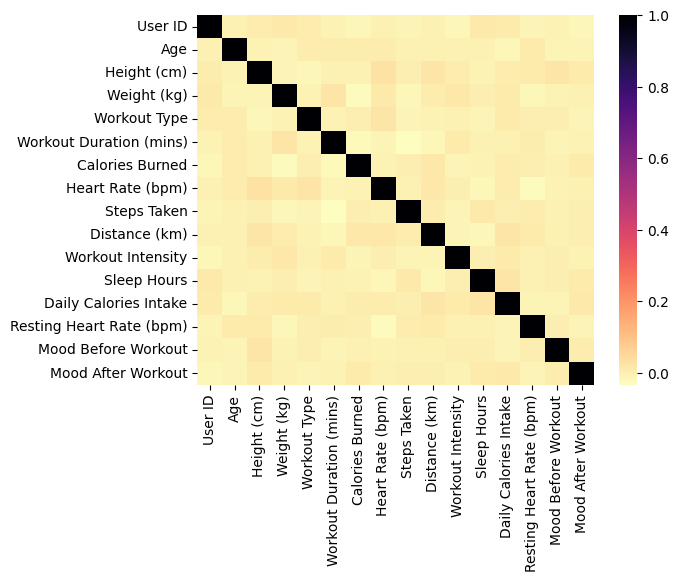

In [74]:
sns.heatmap(df.corr(numeric_only = True), cmap='magma_r')

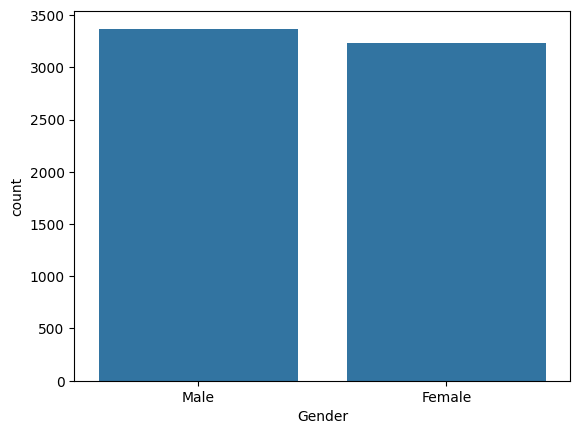

In [75]:
#sns.pairplot(df, kind="scatter", hue="Gender")
sns.countplot(x=df["Gender"]);

<Axes: xlabel='CaloriesBurnedGroup', ylabel='count'>

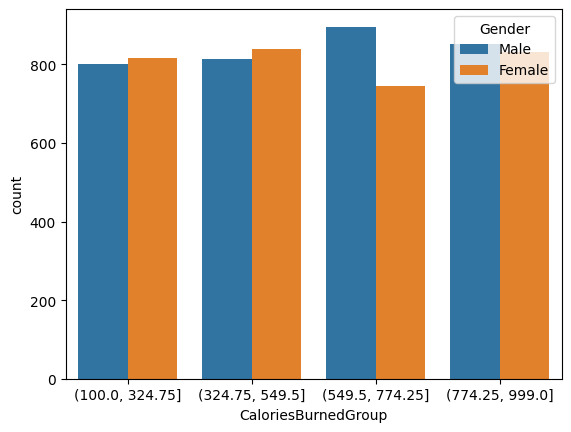

In [76]:

df["CaloriesBurnedGroup"] = pd.cut(x=df['Calories Burned'], bins = np.linspace(df['Calories Burned'].min(), df['Calories Burned'].max(), 5))
sns.countplot(data=df, x="CaloriesBurnedGroup", hue='Gender')


<Axes: >

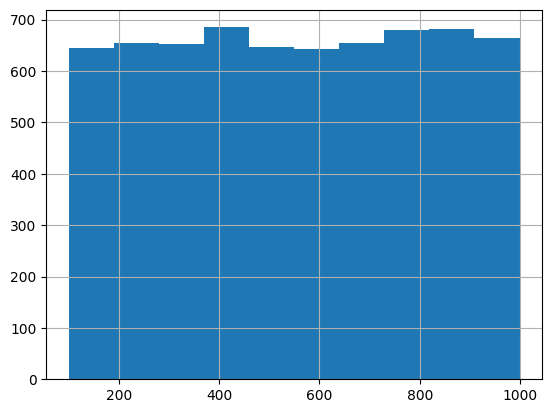

In [77]:
df['Calories Burned'].hist()

<Axes: >

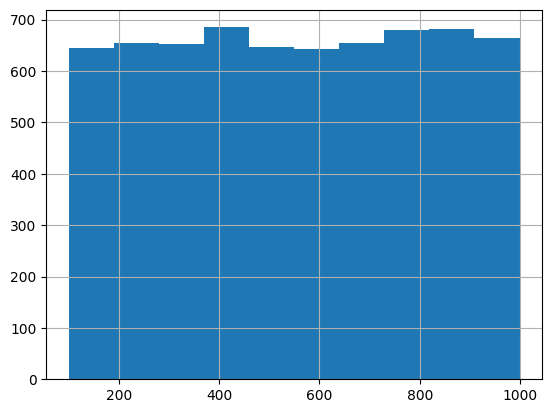

In [78]:
df['Calories Burned'].hist()


<Axes: >

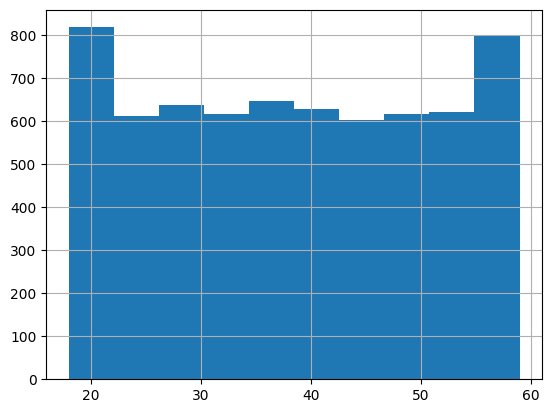

In [79]:
df['Age'].hist()


<Axes: >

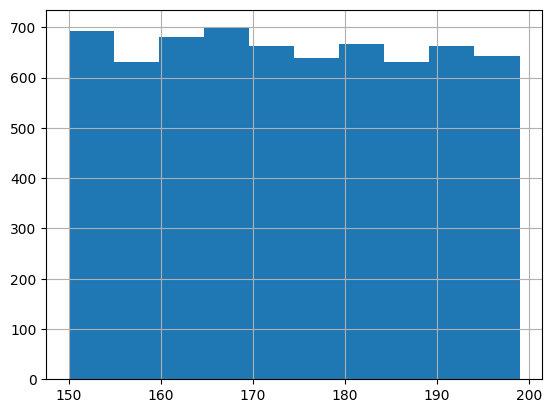

In [80]:
df['Height (cm)'].hist()


<Axes: >

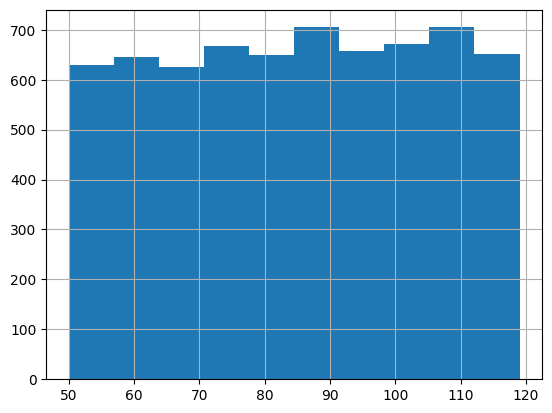

In [81]:
df['Weight (kg)'].hist()


<Axes: >

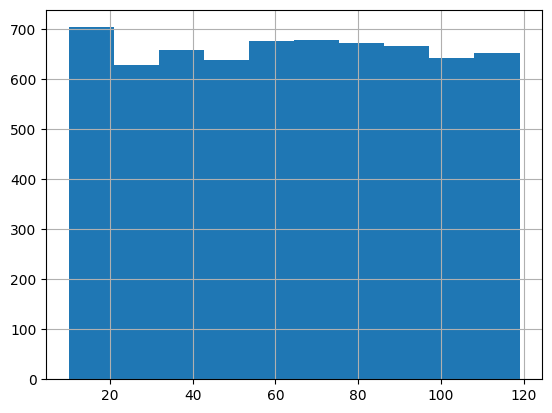

In [82]:
df['Workout Duration (mins)'].hist()


<Axes: >

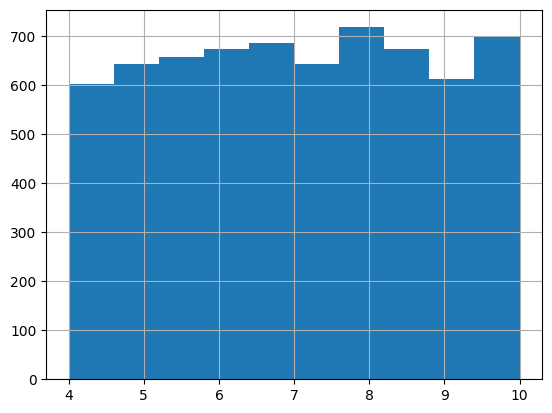

In [83]:
df['Sleep Hours'].hist()


<Axes: >

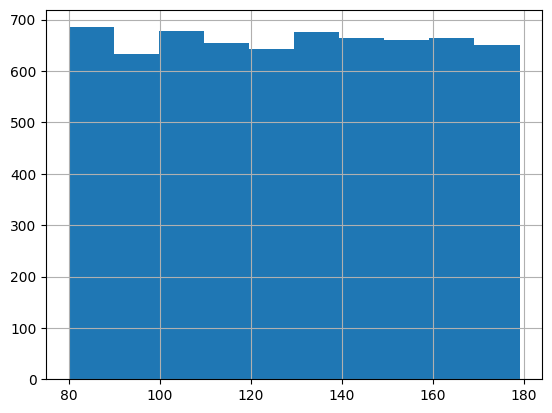

In [84]:
df['Heart Rate (bpm)'].hist()


<Axes: >

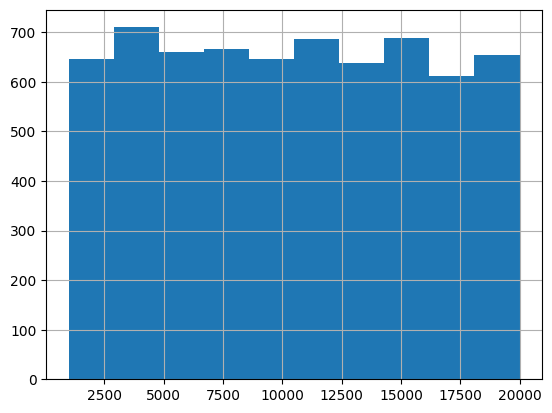

In [85]:
df['Steps Taken'].hist()


<Axes: >

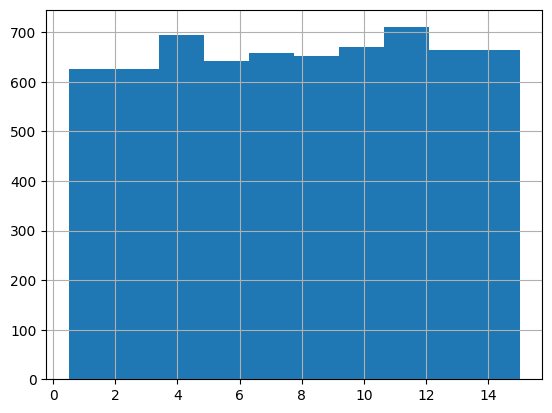

In [86]:
df['Distance (km)'].hist()

Смотря как на гистограммы распределения каждой переменной, так и на тепловую карту, можно сказать - данные распределены подозрительно равномерно и корелляция между ними очень слабая. Это очень странно для данного датасета и наводит на мысль, что данные синтетические